In [2]:
import snap
import sys
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
sys.path.append('../')
from src.util import influence_maximisation, get_influence_set, getInletIds

In [4]:
G_LS174T = snap.LoadEdgeList(snap.PNGraph, "../data/Edgelist_v2/LS174T_clean_EdgesList.txt", 0, 1, '\t')
G_SW1222 = snap.LoadEdgeList(snap.PNGraph, "../data/Edgelist_v2/SW1222_clean_EdgesList.txt", 0, 1, '\t')

In [5]:
total_nodes_LS = G_LS174T.GetNodes()
total_nodes_SW = G_SW1222.GetNodes()
inlets_LS = getInletIds(G_LS174T)
inlets_SW = getInletIds(G_SW1222)

In [6]:
_, _, nodes_covered_LS = influence_maximisation(G_LS174T, inlets_LS, len(inlets_LS))
nodes_covered_frac_LS = np.asarray(nodes_covered_LS)/float(total_nodes_LS)

 98%|█████████▊| 1722/1751 [02:24<00:00, 66.22it/s]

In [ ]:
_, _, nodes_covered_SW = influence_maximisation(G_SW1222, inlets_SW, len(inlets_LS))
nodes_covered_frac_SW = np.asarray(nodes_covered_SW)/float(total_nodes_SW)

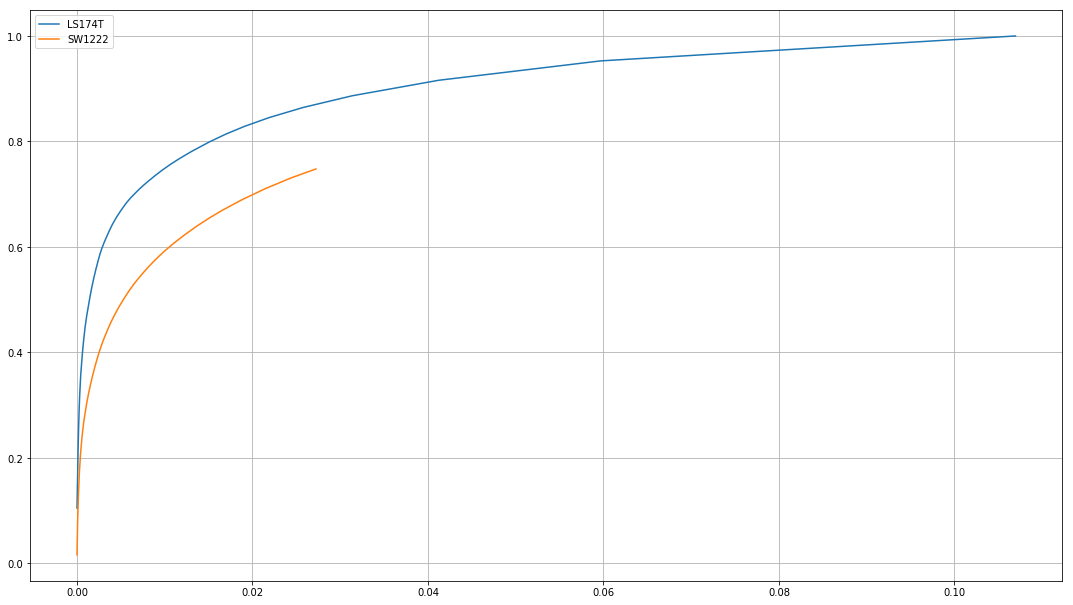

In [8]:
plt.figure()
plt.plot(np.arange(len(nodes_covered_frac_LS))/float(total_nodes_LS), nodes_covered_frac_LS, label='LS174T')
plt.plot(np.arange(len(nodes_covered_frac_SW))/float(total_nodes_SW), nodes_covered_frac_SW, label='SW1222')
plt.legend()
plt.grid()
# plt.yscale('log')
plt.gcf().set_size_inches(18.5, 10.5)
plt.savefig('../figs/influence_maximisation.pdf')
plt.show()
